In [2]:

import pandas as pd
from sqlalchemy import create_engine, types
from sqlalchemy import text # to be able to pass string
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px


In [3]:
# Let's load values from the .env file
from dotenv import dotenv_values

config = dotenv_values()

# define variables for the login
pg_user = config['POSTGRES_USER']  # align the key label with your .env file !
pg_host = config['POSTGRES_HOST']
pg_port = config['POSTGRES_PORT']
pg_db = config['POSTGRES_DB']
pg_schema = config['POSTGRES_SCHEMA']
pg_pass = config['POSTGRES_PASS']

In [4]:
# Now building the URL with the values from the .env file

url = f'postgresql://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}'

In [5]:
engine = create_engine(url, echo=False)

In [21]:
#getting mart_songs.csv from AWS
with engine.begin() as conn: # Done with echo=True
    result = conn.execute(text(f"SELECT * FROM {pg_schema}.mart_song;"))
    mart_song = result.all()

print(mart_song)

[('2017_Iceland', 2017, None, 1.0, 13.0, None, 'Iceland', 'Svala', 'Paper', 'English', 'Pop', None, 'Female', 1, '', '', None, None, None, None, None, None, None, None, 0, 0, 0, 0, 0.0, None, None, None, None, None, 15.0, 31.0, 29.0, 60.0, 0, 0, None, Decimal('0.16759259259259259259')), ('2009_Belgium', 2009, None, 1.0, 3.0, None, 'Belgium', 'Patrick Ouchene', 'Copycat', 'English', 'Pop', None, 'Male', 1, '', '', None, None, None, None, None, None, None, None, 0, 2, 2, 0, 0.0, None, None, None, None, None, 17.0, None, None, 1.0, 0, 0, None, Decimal('0.16814345991561181435')), ('2023_Norway', 2023, 268.0, 1.0, 1.0, 20.0, 'Norway', 'Alessandra', 'Queen of Kings', 'English', 'Pop', 0.0, 'Female', 1, 'E Minor', '10', 110.0, 36.0, 64.0, 23.0, 58.0, 0.0, 10.0, 3.0, 4, 0, 0, 0, 1.0, 216.0, 52.0, 36.0, 11.0, 5.0, 6.0, 102.0, None, 102.0, 0, 0, 1.0, Decimal('0.19193803708729081863')), ('2023_Malta', 2023, None, 1.0, 2.0, None, 'Malta', 'The Busker', 'Dance (Our Own Party)', 'English', 'Pop', No

In [23]:
#defining column names for data from songs_info.csv and setting song column to lowercase 
mart_songs_df = pd.DataFrame(mart_songs, columns=['year_country','year', 'final_total_points', 'semi_final', 'semi_draw_position', 'final_draw_position', 'country', 'artist_name', 'song', 'language', 'style', 'direct_qualifier_10', 'gender', 'main_singers',
        'key', 'loudness_db', 'beats_per_min', 'energy', 'danceability', 'happiness', 
        'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'backing_dancers', 'backing_singers', 
        'backing_instruments', 'instrument_10', 'qualified_10', 
        'final_televote_points', 'final_jury_points', 'final_televote_votes', 
        'final_jury_votes', 'final_place', 'semi_place', 
        'semi_televote_points', 'semi_jury_points', 'semi_total_points', 
        'favourite_10', 'host_10', 'lgbtqia+', 'point_ratio'])

#lowercase for column song
mart_songs_df['song']=mart_songs_df['song'].str.lower()
mart_songs_df

,year_country,year,final_total_points,semi_final,semi_draw_position,final_draw_position,country,artist_name,song,language,...,final_jury_votes,final_place,semi_place,semi_televote_points,semi_jury_points,semi_total_points,favourite_10,host_10,lgbtqia+,point_ratio
0,2017_Iceland,2017,NaN,1.0,13.0,NaN,Iceland,Svala,paper,English,...,NaN,NaN,15.0,31.0,29.0,60.0,0,0,NaN,0.16759259259259259259
1,2009_Belgium,2009,NaN,1.0,3.0,NaN,Belgium,Patrick Ouchene,copycat,English,...,NaN,NaN,17.0,NaN,NaN,1.0,0,0,NaN,0.16814345991561181435
2,2023_Norway,2023,268.0,1.0,1.0,20.0,Norway,Alessandra,queen of kings,English,...,11.0,5.0,6.0,102.0,NaN,102.0,0,0,1.0,0.19193803708729081863
3,2023_Malta,2023,NaN,1.0,2.0,NaN,Malta,The Busker,dance (our own party),English,...,NaN,NaN,15.0,3.0,NaN,3.0,0,0,NaN,0.21326106000876040298
4,2023_Serbia,2023,30.0,1.0,3.0,5.0,Serbia,Luke Black,samo mi se spava,"Serbian, English",...,6.0,24.0,10.0,37.0,NaN,37.0,0,0,0.0,0.20875677506775067751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,2009_France,2009,107.0,NaN,NaN,3.0,France,Patricia Kaas,et s'il fallait le faire,French,...,NaN,8.0,NaN,NaN,NaN,NaN,0,0,0.0,0.19024290671565625638
555,2009_Russia,2009,91.0,NaN,NaN,10.0,Russia,Anastasiya Prikhodko,mamo,"Russian, Ukrainian",...,NaN,11.0,NaN,NaN,NaN,NaN,0,1,0.0,0.32356433506044905009
556,2009_Germany,2009,35.0,NaN,NaN,17.0,Germany,Alex Swings Oscar Sings!,miss kiss kiss bang,English,...,NaN,20.0,NaN,NaN,NaN,NaN,0,0,1.0,0.16555217831813576494
557,2009_United Kingdom,2009,173.0,NaN,NaN,23.0,United Kingdom,Jade Ewen,it's my time,English,...,NaN,5.0,NaN,NaN,NaN,NaN,0,0,0.0,0.21160032167269802975


In [24]:
#getting contestants_enhanced.csv from AWS
with engine.begin() as conn: # Done with echo=True
    result = conn.execute(text(f"SELECT * FROM {pg_schema}.contestants_enhanced;"))
    contestants_enhanced = result.all()

print(contestants_enhanced)

[(1956, 'ch', 'Switzerland', 'Lys Assia', 'refrain', 2.0, None, 2.0, None, 2.0, None, None, None, None, None, None, None, 'Georg Benz Stahl', None, "(Refrain d'amour...)  Refrain, couleur du ciel, parfum de mes vingt ans Jardin plein de soleil où je courais enfant Partout je t'ai cherché, mon amou ... (576 characters truncated) ... ngt ans Chagrin, mélancolie de n'être plus enfant Mais seule et loin de toi, par les chemins où tu n'es pas Je vais, pleurant mes amours de vingt ans", 'https://youtube.com/watch?v=IyqIPvOkiRk', 'final', 'Switzerland', 0.0, 1956, 2025), (1956, 'nl', 'Netherlands', 'Jetty Paerl', 'de vogels van holland', 2.0, None, 1.0, None, 2.0, None, None, None, None, None, None, None, 'Cor Lemaire', 'Annie M. G. Schmidt', "De vogels van Holland zijn zo muzikaal Ze leren in hun prille jeugd al tierelieren De merel, de lijster en de nachtegaal Om zo de lent' in Holland go ... (990 characters truncated) ...  is het gras zo vol dauw Zijn de meisjes zo lief, zijn de meisjes zo

In [25]:
#defining column names for data from contestants_enhanced.csv and setting song column to lowercase 
contestants_enhanced_df = pd.DataFrame(contestants_enhanced, columns=['year', 'to_country_id', 'to_country', 'performer', 'song', 
        'place_contest', 'sf_num', 'running_final', 'running_sf', 
        'place_final', 'points_final', 'place_sf', 'points_sf', 
        'points_tele_final', 'points_jury_final', 'points_tele_sf', 'points_jury_sf', 
        'composers', 'lyricists', 'lyrics', 'youtube_url', 'round', 
        'country', 'lgbtqia+', 'start_year', 'last_year'])
contestants_enhanced_df
#lowercase for column song
contestants_enhanced_df['song']=contestants_enhanced_df['song'].str.lower()

In [26]:
#filtering contestant table for songs in finals only
finals_contestants= contestants_enhanced_df[contestants_enhanced_df['round']=='final']

In [27]:
#reviewing duplicates
finals_contestants_duplicates = finals_contestants[finals_contestants.duplicated(subset=['song'], keep=False)]['song'].unique()
print(finals_contestants_duplicates)

['llámame' 'mata hari' 'vivre' None 'this time' 'solo' 'without your love'
 'angel' 'sister' 'never let you go' 'you are the only one' 'shine'
 'coming home' 'stay' 'gravity' 'miracle' 'storm']


In [31]:
#merging songs_info to finals_contestants
new_merge=pd.merge(
    right=mart_songs_df, 
    left=finals_contestants, 
    how='outer',  # This changes it to a full outer join
    on=('song', 'year')
)

In [32]:
#filtering for 2009-2023 data, following what's available in song_info and sorting by year
songs_contestants_09_23 = new_merge[new_merge['year'].between(2009, 2023)]
songs_contestants_09_23.sort_values(by='year', inplace=True, axis=False)

/var/folders/0p/xg5rvvyj6hg_7r5jw2qnb64m0000gp/T/ipykernel_16495/3628178113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_contestants_09_23.sort_values(by='year', inplace=True, axis=False)


In [33]:
# Ploting song happiness trend over years per country
fig = px.line(data_frame=songs_contestants_09_23, 
              x='year', 
              y='happiness', 
              height=500, 
              title="happiness in Eurovision songs over years per country", 
              markers=True,
              color='to_country'
             )
fig.show()
#fig
#fig.show(renderer="browser")

In [35]:
#finland only filter, sorting by year and switching years datatype to datetime
finland_only=songs_contestants_09_23[songs_contestants_09_23['to_country']== 'Finland']
finland_only.sort_values(by='year', inplace=True)
finland_only['year'] = pd.to_datetime(finland_only['year'], format='%Y').dt.year


/var/folders/0p/xg5rvvyj6hg_7r5jw2qnb64m0000gp/T/ipykernel_16495/3087666100.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0p/xg5rvvyj6hg_7r5jw2qnb64m0000gp/T/ipykernel_16495/3087666100.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
# Ploting song happiness trend overyears per country Finland

fig = px.line(data_frame=finland_only, 
              x='year', 
              y='happiness', 
              height=500, 
              title="Finland: Happiness in Eurovision Songs over years", 
              markers=True,
              color='to_country'
             )
fig.show()
#fig
#fig.show(renderer="browser")

In [37]:
#TOP 10 : boolean mask for the finalists taking first 10 places
top_10 = songs_contestants_09_23[
    (songs_contestants_09_23['place_contest'].isin(range(0, 11))) & 
    (songs_contestants_09_23['year'].between(2013, 2023))
]
top_10.sort_values(by='year', axis=False, inplace=True)

/var/folders/0p/xg5rvvyj6hg_7r5jw2qnb64m0000gp/T/ipykernel_16495/775114153.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
#LAST 10 :boolean mask for the finalists taking last 10 places
last_10 = songs_contestants_09_23[songs_contestants_09_23['place_contest'].isin(range(16, 28))& 
    (songs_contestants_09_23['year'].between(2013, 2023))]
last_10.sort_values(by='year', axis=False, inplace=True)

/var/folders/0p/xg5rvvyj6hg_7r5jw2qnb64m0000gp/T/ipykernel_16495/2213561799.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
#WINNERS boolean mask for contest winners in 2009-2023
winners = songs_contestants_09_23[songs_contestants_09_23['place_contest'].isin([1])]

<Axes: xlabel='to_country', ylabel='Count'>

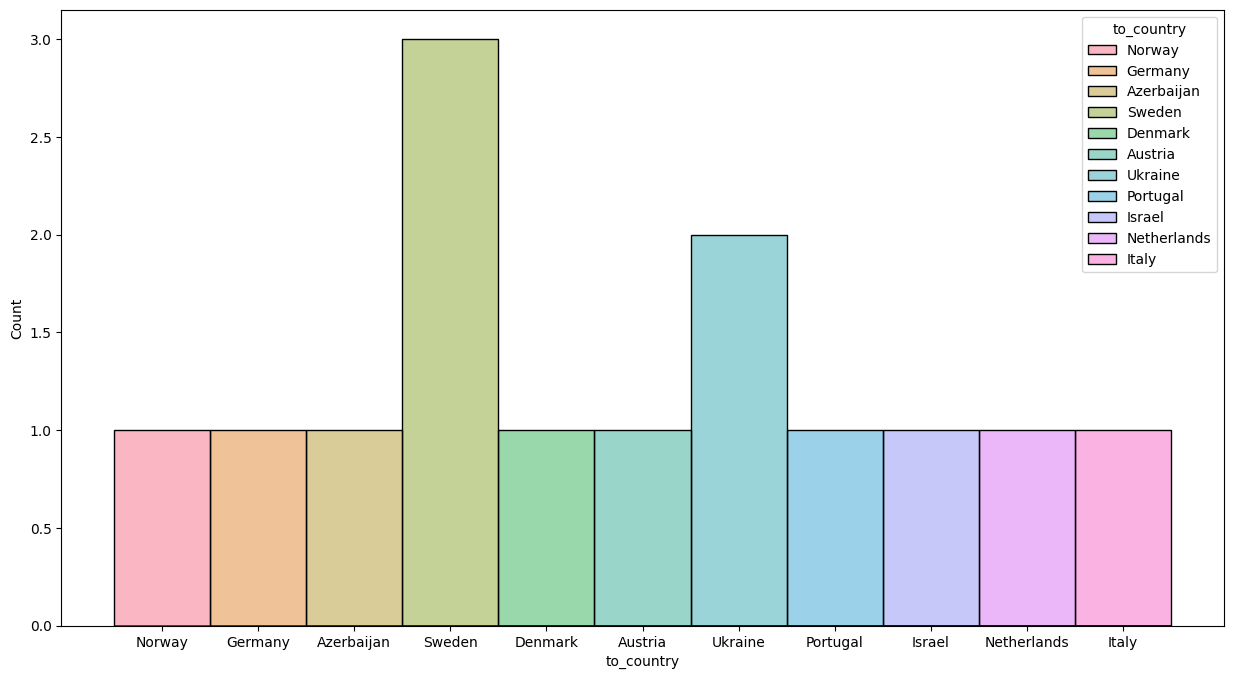

In [40]:
#Eurovision winners 2009-2023
plt.figure(figsize=(15,8))

sns.histplot(data=winners, x='to_country', hue='to_country')

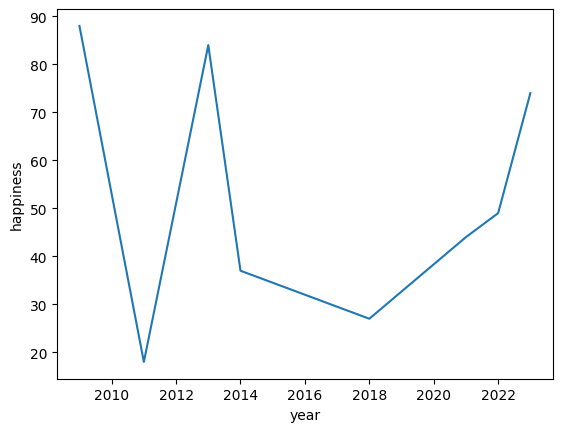

In [41]:
sns.lineplot(x=finland_only.year,y=finland_only.happiness);

In [42]:
#LANAGUAGES IN EUROVISION FINALS 

fig = px.bar( songs_contestants_09_23,
             x='year', 
             y='language', 
             color='language',
             orientation='v',  # Change to vertical bars
             height=400)
fig.show()

In [43]:
##top10 from 2013-2023, backing_singers (13%% correlation with final_place)

import plotly.express as px
fig1 = px.box(top_10, x="year", y="backing_singers", points="all", title="Backing Singers Trend in Eurovision's Top 10 over 2013-2023")
fig1.show()

In [44]:
#last10 from 2013-2023, backing_singers (13%% correlation with final_place)
fig2 = px.box(last_10, x="year", y="backing_singers", points="all", title="Backing Singers Trend in Eurovision's Last 10 over 2013-2023")
fig2.show()

In [45]:
#top10 from 2013-2023, beats_per_min (17% correlation with final_place)
fig3 = px.box(top_10, x="year", y="beats_per_min", points="all", title="BPM Trend in Eurovision's Top 10 over 2013-2023")
fig3.show()

In [46]:
#last10 from 2013-2023, beats_per_min (17% correlation with final_place)
fig4 = px.box(last_10, x="year", y="beats_per_min", points="all", title="BPM Trend in Eurovision's Last 10 over 2013-2023")
fig4.show()

In [47]:
##top10 from 2013-2023, acousticness (-14% correlation with final_place)
fig5 = px.box(top_10, x="year", y="acousticness", points="all", title="Acousticness Trend in Eurovision's Top 10 over 2013-2023")
fig5.show()

In [48]:
##last10 from 2013-2023, acousticness (-14% correlation with final_place)
fig6 = px.box(last_10, x="year", y="acousticness", points="all", title="Acousticness Trend in Eurovision's Last 10 over 2013-2023")
fig6.show()